In this session, we will see how to stack/merge multiple fits images. 

Credits to: http://coolwiki.ipac.caltech.edu/index.php/How_can_I_get_data_from_other_wavelengths_to_compare_with_infrared_data_from_Spitzer%3F

'Eagle Nebula' fits downloaded from http://irsa.ipac.caltech.edu/applications/wise/. Extracted, renamed and moved into folder 'merge_multi_fits', on the same level as this code.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

image_load=fits.open('merge_multi_fits/eagle_nebula_1.fits')
data_1=np.array(image_load[0].data)
image_load.close()
image_load=fits.open('merge_multi_fits/eagle_nebula_2.fits')
data_2=np.array(image_load[0].data)
image_load.close()
image_load=fits.open('merge_multi_fits/eagle_nebula_3.fits')
data_3=np.array(image_load[0].data)
image_load.close()
image_load=fits.open('merge_multi_fits/eagle_nebula_4.fits')
data_4=np.array(image_load[0].data)
image_load.close()
print(data_1.shape)
print(data_2.shape)
print(data_3.shape)
print(data_4.shape)


(438, 438)
(438, 438)
(438, 438)
(438, 438)


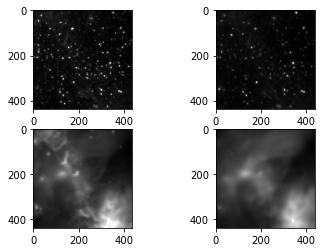

In [2]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.imshow(data_1, cmap='gray')

ax2 = fig.add_subplot(222)
ax2.imshow(data_2, cmap='gray')

ax3 = fig.add_subplot(223)
ax3.imshow(data_3, cmap='gray')

ax4 = fig.add_subplot(224)
ax4.imshow(data_4, cmap='gray')

plt.show()

Now, let us merge all four (with false color) and plot in one image. this min-max gives us the range of values in each image.

In [3]:
print(np.min(data_1))
print(np.max(data_1))
print(np.min(data_2))
print(np.max(data_2))
print(np.min(data_3))
print(np.max(data_3))
print(np.min(data_4))
print(np.max(data_4))

67.9777
2501.01
65.3064
2278.42
nan
nan
452.862
2410.85


first, we will convert the values to scale of 0 to 1, i.e. normalise them.
data_3 has Nan, these values will be replaced by median of non-nan values:


In [4]:
d1=data_1/np.max(data_1)
d2=data_2/np.max(data_2)

data_3[np.isnan(data_3)] = np.median(data_3[~np.isnan(data_3)])# this line resets nan in data_3 with median of non-nan values
d3=data_3/np.max(data_3)
print(d3)
#d3[np.isnan(d3)] = np.median(data_3)/np.max(data_3)
#print(d3)

d4=data_4/np.max(data_4)

[[ 0.31603205  0.31838691  0.32106507 ...,  0.22098115  0.21970472
   0.21863692]
 [ 0.31688097  0.31922948  0.32195723 ...,  0.22093108  0.21973887
   0.21873304]
 [ 0.31788743  0.32022294  0.322999   ...,  0.22062203  0.21955007
   0.21864596]
 ..., 
 [ 0.22824067  0.22930759  0.23021048 ...,  0.58947992  0.58905911
   0.5881384 ]
 [ 0.22924992  0.23024076  0.23109132 ...,  0.59312862  0.59285861
   0.59208089]
 [ 0.23038937  0.23125294  0.23200679 ...,  0.59665358  0.59662479
   0.59608239]]


Just, to ensure data are fine, we will plot these normalised datasets:

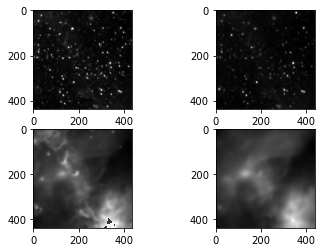

In [5]:
fig = plt.figure()

merged=(d1*256)
ax1 = fig.add_subplot(221)
ax1.imshow(d1, cmap='gray')

ax2 = fig.add_subplot(222)
ax2.imshow(d2, cmap='gray')

ax3 = fig.add_subplot(223)
ax3.imshow(d3, cmap='gray')

ax4 = fig.add_subplot(224)
ax4.imshow(d4, cmap='gray')

plt.show()

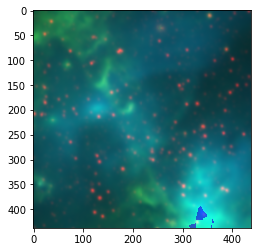

In [6]:
# now, we will club three fits into RGB image. let us take 1, 3,4 and fill them with colors. Note: red, green, blue are given here arbitrarily.
# plot the final RGB image. 
# these are only for an idea. ===False color notations mention that each wavelength is given a particular color===

nrows=len(d1)
ncols=len(d1[0])
rgba_array = np.empty((ncols,nrows,4), np.uint8) # assuming 8 bits per channnel
#we are taking just three fits images, at different wavelengths, and merging:
rgba_array[:,:,0] = d1*256 # red
rgba_array[:,:,1] = d3*256 # green
rgba_array[:,:,2] = d4*256 # blue
rgba_array[:,:,3] = 255 # Alpha : 255 means 100% transparency, 0 means opaque.

plt.imshow(rgba_array)
plt.savefig('RGB_image.png') # saves the rgb image into png image file.
plt.show()
